In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [6]:
import nltk

In [7]:
import re

In [8]:
from nltk.corpus import stopwords

In [9]:
import string

In [10]:
#importing data
data=pd.read_csv(r'C:\Users\Jacintah\Desktop\Sample Data\filename.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1597756626223894528,1597756626223894528,2022-11-30 00:57:19 UTC,2022-11-30,00:57:19,0,1597755144908709888,outcall_dubai44,massage spa in dubai,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1597756613942988801,1597756609710944256,2022-11-30 00:57:16 UTC,2022-11-30,00:57:16,0,1546108609679052802,russiaxeorigenz,Russia Xe Mars Koch Buffett Ellison Kiria Origenz,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1597756611443175424,1597696847820521473,2022-11-30 00:57:15 UTC,2022-11-30,00:57:15,0,1587248348389687296,tjboyle4,TJ Boyle,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Nargiza2673', 'name': 'Nargi...",NaN,NaN,NaN,NaN
3,1597756609710944256,1597756609710944256,2022-11-30 00:57:15 UTC,2022-11-30,00:57:15,0,1546108609679052802,russiaxeorigenz,Russia Xe Mars Koch Buffett Ellison Kiria Origenz,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1597756602022760448,1597756602022760448,2022-11-30 00:57:13 UTC,2022-11-30,00:57:13,0,2305438117,z06ronald,Ronald van Keekem,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [11]:
#columns of the data
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [12]:
#extracting the columns I need
data=data[["username","tweet","language",]]

In [13]:
#checkimg for null values
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [14]:
#tweets in different languages
data["language"].value_counts()

en     8452
pt      392
it      260
qme     212
in      142
und      94
ru       94
ja       62
es       42
de       31
qht      25
fr       24
ca       24
cs       16
vi       15
uk       14
nl       13
ro       11
ar        9
qam       9
fi        9
tl        8
th        8
pl        6
zxx       5
zh        5
no        4
et        3
fa        3
tr        3
qst       2
hi        2
art       2
ur        1
hu        1
sv        1
ht        1
el        1
iw        1
Name: language, dtype: int64

In [15]:
#removing punctuations in English tweets
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopwords=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jacintah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#removing links,punctuation,symbols and other language errors from tweets

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
        
    

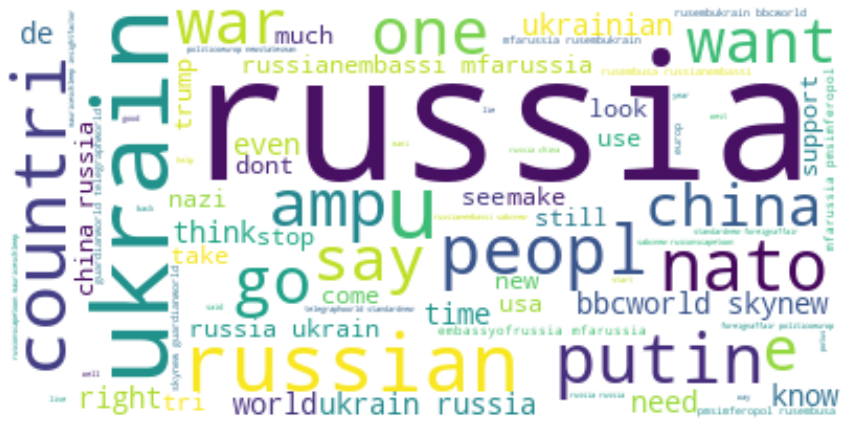

In [18]:
text =' '.join(i for i in data["tweet"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
#Calculating sentiment scores
nltk.download('vader_lexicon')
sentiments= SentimentIntensityAnalyzer()
data["Positive"]= [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"]= [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"]= [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data= data[["tweet","Positive","Negative","Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jacintah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  💞💞💞 massag vip russia massag dubai massag girl...      0.18     0.000   
1          name unconstitut infact name illeg 🤣🤣🤣🤣🤣       0.00     0.000   
2   wendellwicket khersonfrom well new york found...      0.29     0.000   
3  pleas careful men answer  daniel  name red fla...      0.30     0.066   
4  unit state worldwid geopolit analysi russia uk...      0.00     0.091   

   Neutral  
0    0.820  
1    1.000  
2    0.710  
3    0.634  
4    0.909  


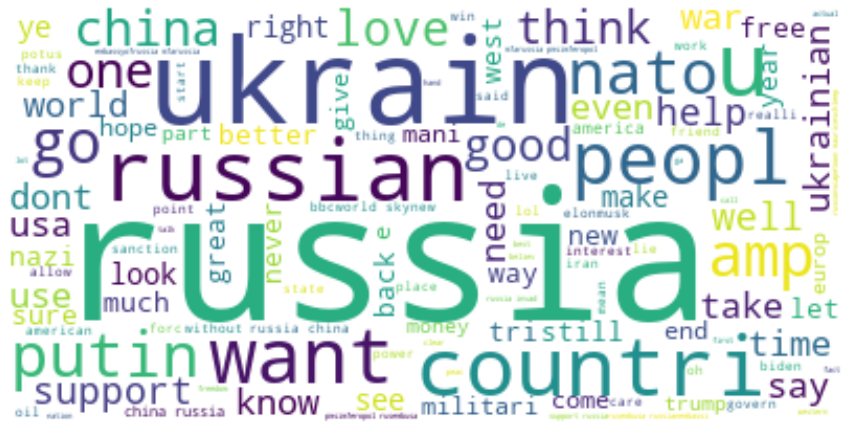

In [20]:
#most frequent words used by people with Positive tweets
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

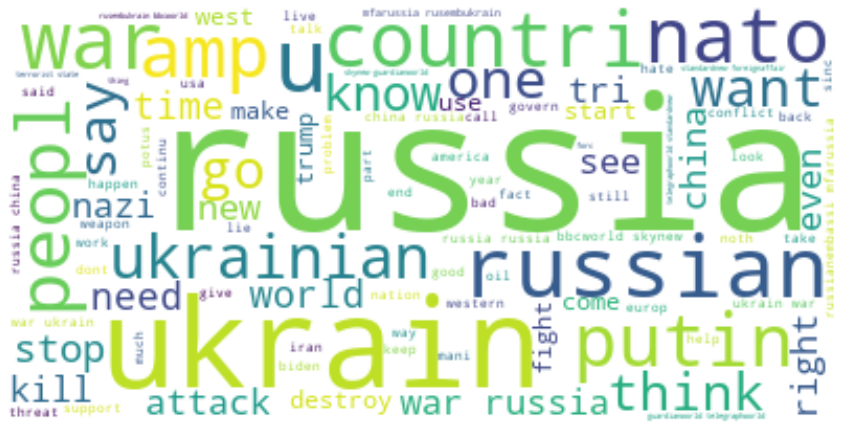

In [23]:
#most frequent words used by people with Negative tweets
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()